In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from io import StringIO
from io import BytesIO
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Defining the url for the dataset
urlds="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/Sp22/Team1_NYC_Restaurant_Inspections.zip"

#Access to datasets via URLs is usually easy (see command below) but we have to work around a security issue in our case.
csvdata=requests.get(urlds,verify=False).content  #this will generate a warning but you can proceed

zf = ZipFile(BytesIO(csvdata),'r')  #The dataset is being accessed from a zip file so this step is needed. 
#It might take a while for all of the data to be accessed. Be patient.

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [3]:
#Opening the dataset file and reading it into a data frame called "data"
data=pd.read_csv(zf.open("Team1_DOHMH_NYC_Restaurant_Inspections.csv"))

In [4]:
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50008319,POULETTE,Manhattan,790,9 AVENUE,10019.0,2129569488,Chicken,01/28/2019,Violations were cited in the following area(s).,...,03/24/2022,Cycle Inspection / Initial Inspection,40.765040,-73.987795,104.0,3.0,13300.0,1025235.0,1.010430e+09,MN15
1,50100420,SOHO DINER,Manhattan,320,WEST BROADWAY,10013.0,2129653091,American,01/02/2020,Violations were cited in the following area(s).,...,03/24/2022,Pre-permit (Operational) / Initial Inspection,40.721906,-74.004178,102.0,1.0,4700.0,1087764.0,1.002270e+09,MN24
2,41678734,TINY'S DINER,Bronx,3603,RIVERDALE AVENUE,10463.0,7187087600,American,09/23/2019,Violations were cited in the following area(s).,...,03/24/2022,Cycle Inspection / Initial Inspection,40.886691,-73.907056,208.0,11.0,29500.0,2084186.0,2.057960e+09,BX29
3,40795021,TAO RESTAURANT,Manhattan,42,EAST 58 STREET,10022.0,2128882288,Asian/Asian Fusion,03/11/2020,Violations were cited in the following area(s).,...,03/24/2022,Cycle Inspection / Initial Inspection,40.762786,-73.971486,105.0,4.0,11202.0,1036073.0,1.012930e+09,MN17
4,40795021,TAO RESTAURANT,Manhattan,42,EAST 58 STREET,10022.0,2128882288,Asian/Asian Fusion,03/11/2020,Violations were cited in the following area(s).,...,03/24/2022,Cycle Inspection / Initial Inspection,40.762786,-73.971486,105.0,4.0,11202.0,1036073.0,1.012930e+09,MN17


In [5]:
data.columns = [c.replace(' ', '_') for c in data.columns]

In [6]:
print(data.columns.tolist())

['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'CUISINE_DESCRIPTION', 'INSPECTION_DATE', 'ACTION', 'VIOLATION_CODE', 'VIOLATION_DESCRIPTION', 'CRITICAL_FLAG', 'SCORE', 'GRADE', 'GRADE_DATE', 'RECORD_DATE', 'INSPECTION_TYPE', 'Latitude', 'Longitude', 'Community_Board', 'Council_District', 'Census_Tract', 'BIN', 'BBL', 'NTA']


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327812 entries, 0 to 327811
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  327812 non-null  int64  
 1   DBA                    326509 non-null  object 
 2   BORO                   327812 non-null  object 
 3   BUILDING               327228 non-null  object 
 4   STREET                 327799 non-null  object 
 5   ZIPCODE                322825 non-null  float64
 6   PHONE                  327784 non-null  object 
 7   CUISINE_DESCRIPTION    323843 non-null  object 
 8   INSPECTION_DATE        327812 non-null  object 
 9   ACTION                 323844 non-null  object 
 10  VIOLATION_CODE         320176 non-null  object 
 11  VIOLATION_DESCRIPTION  322139 non-null  object 
 12  CRITICAL_FLAG          327812 non-null  object 
 13  SCORE                  312629 non-null  float64
 14  GRADE                  165640 non-nu

In [10]:
mapdata = data.drop_duplicates(subset=['CAMIS']) # Only keep unique restaurant ID
mapdata = mapdata.dropna(subset=['GRADE','VIOLATION_DESCRIPTION','Latitude','Longitude','GRADE_DATE'])

In [11]:
mapdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14664 entries, 5 to 327646
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CAMIS                  14664 non-null  int64  
 1   DBA                    14663 non-null  object 
 2   BORO                   14664 non-null  object 
 3   BUILDING               14622 non-null  object 
 4   STREET                 14664 non-null  object 
 5   ZIPCODE                14414 non-null  float64
 6   PHONE                  14662 non-null  object 
 7   CUISINE_DESCRIPTION    14664 non-null  object 
 8   INSPECTION_DATE        14664 non-null  object 
 9   ACTION                 14664 non-null  object 
 10  VIOLATION_CODE         14638 non-null  object 
 11  VIOLATION_DESCRIPTION  14664 non-null  object 
 12  CRITICAL_FLAG          14664 non-null  object 
 13  SCORE                  14664 non-null  float64
 14  GRADE                  14664 non-null  object 
 15  G

## Visualizations

By processing the data, the top 6 food types in CUISINE_DESCRIPTION were selected. The data was then visualized according to the different BOROs.

In [12]:
# Select the top 5 CUISINE_DESCRIPTION in the data and calculate the total
def top6_cuisine():
    cuisine = mapdata.groupby('CUISINE_DESCRIPTION').size().to_frame('TOTAL')
    cuisine = cuisine.reset_index()
    Sorted = cuisine.sort_values(['TOTAL'],ascending=False)
    return Sorted
top6 = top6_cuisine()
#print(top6)

In [13]:
top6=top6.replace(top6.groupby('CUISINE_DESCRIPTION').sum().sort_values(by='TOTAL',ascending=False).index[6:], 'Other').groupby('CUISINE_DESCRIPTION').sum()

In [14]:
top6=top6.sort_values(['TOTAL'],ascending=False)
top6

,TOTAL
CUISINE_DESCRIPTION,
Other,7210
American,3097
Chinese,1261
Coffee/Tea,1191
Pizza,886
Italian,544
Japanese,475


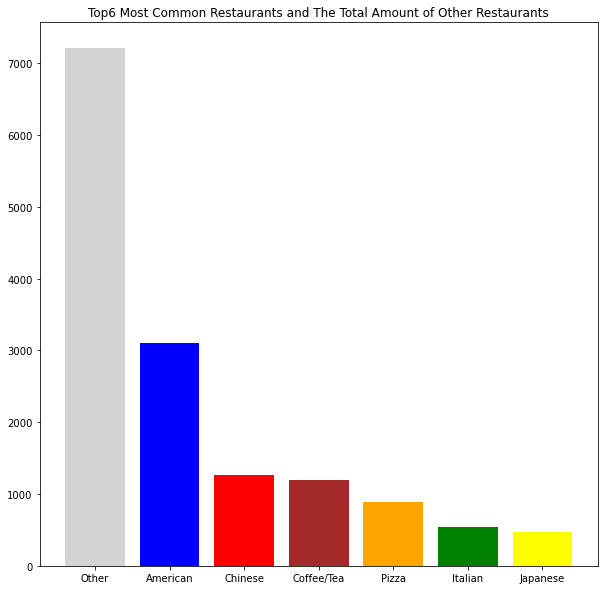

In [10]:
# top 6 cussine
plt.subplots(figsize=(10,10))
plt.bar(top6.index,top6['TOTAL'],color=['lightgrey','blue','red','brown','orange','green','yellow'])
plt.title('Top6 Most Common Restaurants and The Total Amount of Other Restaurants')
plt.savefig('top6.pdf')  
plt.show()

In [11]:
def top6_cuisine():
    cuisine = mapdata.groupby('CUISINE_DESCRIPTION').size().to_frame('TOTAL')
    cuisine = cuisine.reset_index()
    Sorted = cuisine.sort_values(['TOTAL'],ascending=False)
    return Sorted.head(6)
top6 = top6_cuisine()
print(top6)

   CUISINE_DESCRIPTION  TOTAL
2             American   3097
15             Chinese   1261
18          Coffee/Tea   1191
62               Pizza    886
43             Italian    544
44            Japanese    475


In [12]:
other = {'CUISINE_DESCRIPTION': 'Other Restaurants', 'TOTAL': 7210}
top6 = top6.append(other, ignore_index = True)

In [13]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'lightgreen', alpha =.5))

/tmp/ipykernel_54/4186969415.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], ha = 'center',


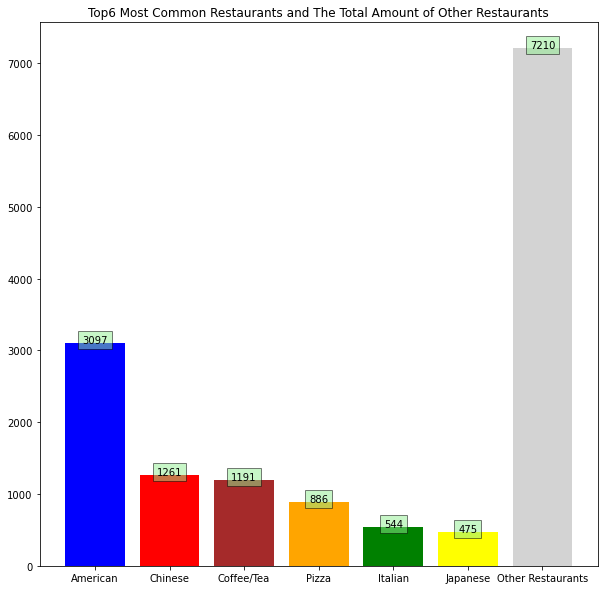

In [14]:
# Make the plot looks better
plt.subplots(figsize=(10,10))
plt.bar(top6.CUISINE_DESCRIPTION,top6['TOTAL'],color=['blue','red','brown','orange','green','yellow','lightgrey'])
addlabels(top6.CUISINE_DESCRIPTION, top6['TOTAL'])
plt.title('Top6 Most Common Restaurants and The Total Amount of Other Restaurants')
plt.savefig('top6.pdf')  
plt.show()

In [15]:
# put the 'CUISINE_DESCRIPTION','BORO','Latitude', and 'Longitude' into new dataframe
def top6_cuisine_area():
    cuisine_area = mapdata.groupby(['CUISINE_DESCRIPTION','BORO','Latitude','Longitude']).size()
    cuisine_area = cuisine_area.reset_index()
    #Sorted = cuisine_area.sort_values(ascending=False)
    return cuisine_area
dt = top6_cuisine_area()
#dt

,CUISINE_DESCRIPTION,BORO,Latitude,Longitude,0
0,Afghan,Brooklyn,40.633534,-73.967149,1
1,Afghan,Brooklyn,40.733582,-73.954828,1
2,Afghan,Manhattan,40.754569,-73.989363,1
3,Afghan,Manhattan,40.764993,-73.987856,1
4,Afghan,Manhattan,40.767975,-73.958978,1
...,...,...,...,...,...
13872,Vegetarian,Queens,40.730576,-73.863627,1
13873,Vegetarian,Queens,40.735411,-73.717189,1
13874,Vegetarian,Queens,40.736995,-73.709900,1
13875,Vegetarian,Queens,40.755515,-73.814971,1


In [16]:
# Filter out 'American', 'Chinese', 'Coffee/Tea', 'Pizza', 'Italian' and put it into new dataframe as name dt
dt = dt[dt['CUISINE_DESCRIPTION'].isin(['American','Chinese','Coffee/Tea','Pizza','Italian','Japanese'])]
#dt

,CUISINE_DESCRIPTION,BORO,Latitude,Longitude,0
45,American,Bronx,0.000000,0.000000,4
46,American,Bronx,40.800344,-73.910670,1
47,American,Bronx,40.800840,-73.913371,1
48,American,Bronx,40.801980,-73.910314,1
49,American,Bronx,40.802221,-73.920770,1
...,...,...,...,...,...
12126,Pizza,Staten Island,40.634739,-74.110696,1
12127,Pizza,Staten Island,40.637770,-74.076140,1
12128,Pizza,Staten Island,40.638229,-74.079200,1
12129,Pizza,Staten Island,40.643726,-74.072789,1


In [17]:
# check the element in 'CUISINE_DESCRIPTION'
dt['CUISINE_DESCRIPTION'].unique()

array(['American', 'Chinese', 'Coffee/Tea', 'Italian', 'Japanese',
       'Pizza'], dtype=object)

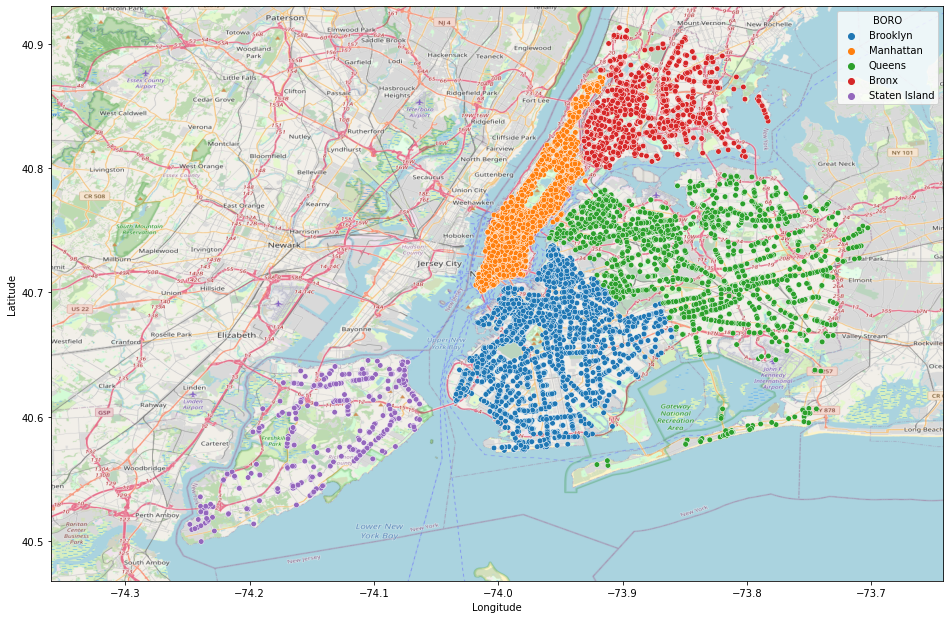

In [18]:
# The boundaries of the image map
map_box = [-74.3600, -73.6420, 40.4680, 40.9300]
# The name of the image of the New York map might be different.
map_img = plt.imread('ny.png')
fig, ax = plt.subplots(figsize=(16, 16))
sns.scatterplot(x=mapdata.Longitude, y=mapdata.Latitude, hue=mapdata.BORO, s=30, data=mapdata)
ax.set_ylim(map_box[2], map_box[3])
ax.set_xlim(map_box[0], map_box[1])
ax.imshow(map_img, extent=map_box, alpha=1)
plt.savefig("nyc_new.pdf")
plt.show()

<Figure size 1152x1152 with 0 Axes>

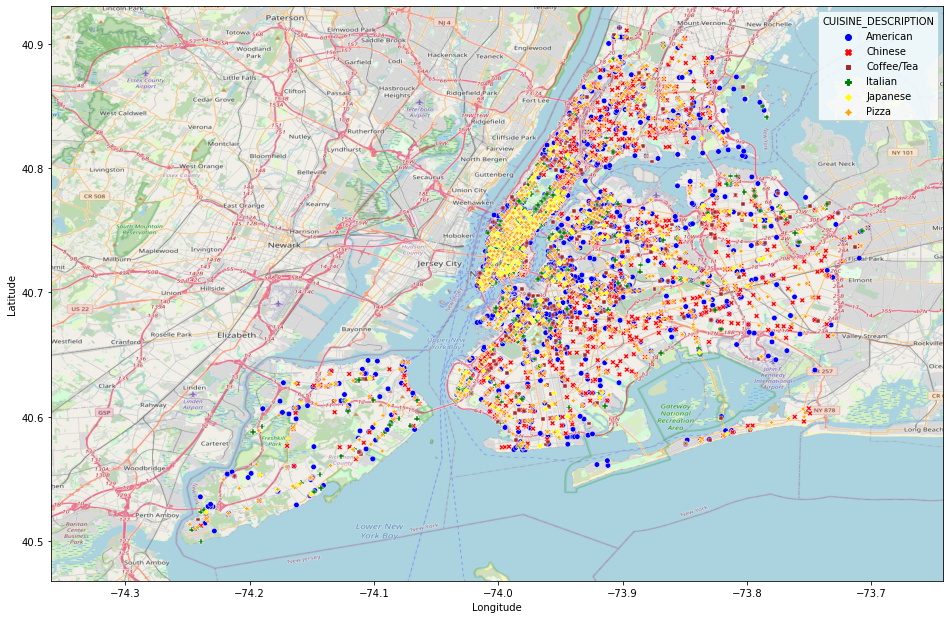

In [19]:
# The boundaries of the image map
plt.figure(figsize=(16, 16))
map_box = [-74.3600, -73.6420, 40.4680, 40.9300]
# The name of the image of the New York map might be different.
map_img = plt.imread('ny.png')
fig, ax = plt.subplots(figsize=(16, 16))
sns.scatterplot(x=dt.Longitude, y=dt.Latitude, hue=dt.CUISINE_DESCRIPTION, s=30, style=dt.CUISINE_DESCRIPTION, data=dt,
               palette=['blue','red','brown','green','yellow','orange'], legend='full')
ax.set_ylim(map_box[2], map_box[3])
ax.set_xlim(map_box[0], map_box[1])
ax.imshow(map_img, extent=map_box, alpha=1)
plt.savefig("nyc_cui.pdf")
plt.show()

## Grade

In [28]:
bardata=data.groupby('BORO')['GRADE'].value_counts().unstack().fillna(0).astype(int)
bardata = bardata.rename_axis(columns=None)
bardata = bardata.drop(labels=['0'],axis=0)
bardata = bardata.drop(columns=['G', 'N'])
bardata # we keep only A,B,C,P,Z grade for the grade data

,A,B,C,P,Z
BORO,,,,,
Bronx,12291,2275,892,220,327
Brooklyn,31041,4569,1867,542,997
Manhattan,51478,7093,2880,655,1109
Queens,29819,4457,1973,464,907
Staten Island,4450,556,186,48,107


In [29]:
mapdata['GRADE'].unique()

array(['A', 'B', 'P', 'Z', 'C', 'N'], dtype=object)

In [30]:
mapdata['GRADE'].isnull().sum()

0

In [31]:
bardata.index

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object', name='BORO')

In [43]:
'''plt.figure(figsize=(10,10))
plt.bar(bardata.index, bardata.A, color='Lightgreen')
plt.bar(bardata.index, bardata.B, color='Yellow')
plt.bar(bardata.index, bardata.C, color='Red')

plt.xlabel('Boro')
plt.ylabel('Counts')
plt.title('Restaurant Grade by Boro')
plt.legend(['A Grade','B Grade','C Grade'])
plt.show()'''

"plt.figure(figsize=(10,10))\nplt.bar(bardata.index, bardata.A, color='Lightgreen')\nplt.bar(bardata.index, bardata.B, color='Yellow')\nplt.bar(bardata.index, bardata.C, color='Red')\n\nplt.xlabel('Boro')\nplt.ylabel('Counts')\nplt.title('Restaurant Grade by Boro')\nplt.legend(['A Grade','B Grade','C Grade'])\nplt.show()"

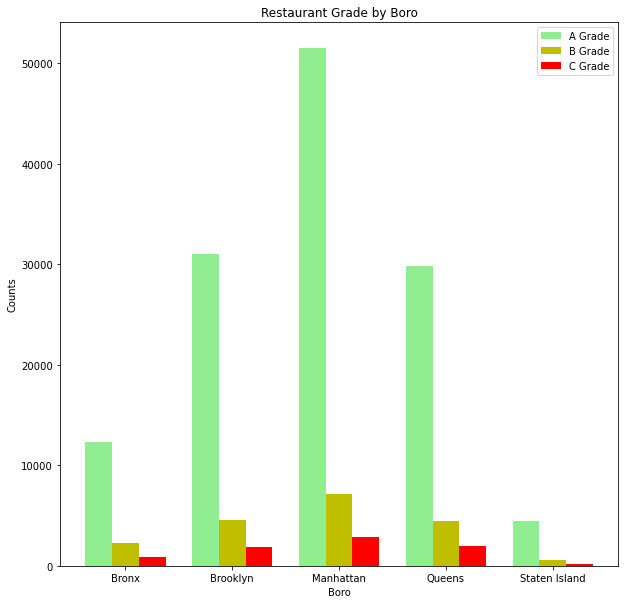

In [32]:
label = ["Bronx","Brooklyn","Manhattan","Queens","Staten Island"]
width = 0.25
x = np.arange(len(bardata.index))

plt.subplots(figsize=(10,10))
plt.bar(x - width, bardata.A, width, align="center", color='Lightgreen')
plt.bar(x, bardata.B, width, align="center", color='y')
plt.bar(x + width, bardata.C, width, align="center", color='r')

plt.xlabel('Boro')
plt.ylabel('Counts')
plt.title('Restaurant Grade by Boro')
plt.legend(['A Grade','B Grade','C Grade'])
plt.xticks(x, labels=label)
plt.savefig('grade.png', dpi=300)
plt.show()

In [33]:
garde = mapdata.groupby('GRADE').size().to_frame('TOTAL')

In [34]:
garde = garde.drop(labels=['N'],axis=0)

In [35]:
garde

,TOTAL
GRADE,
A,13238
B,825
C,307
P,71
Z,220


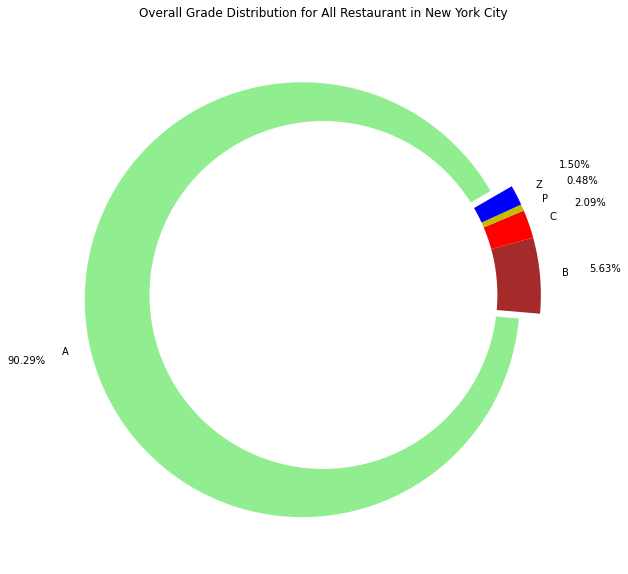

In [36]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
explode = (0.1,0,0,0,0)
ax1.pie(garde.TOTAL, labels=garde.index, autopct='%1.2f%%',
        colors = ['Lightgreen','brown','red','y','blue'],
        startangle=30, pctdistance=1.3, explode = explode) 
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Overall Grade Distribution for All Restaurant in New York City")
plt.savefig('overall_grade.pdf')  
plt.show()

In [40]:
gardeby_cuisine = mapdata.groupby('GRADE' )['CUISINE_DESCRIPTION'].value_counts().unstack().fillna(0).astype(int).rename_axis(columns=None)
gardeby_cuisine = gardeby_cuisine[['American', 'Chinese', 'Coffee/Tea', 'Pizza', 'Italian','Japanese']]
gardeby_cuisine

# using groupby to filter the data, we can visually see the number of grades in the top 5 cuisines

,American,Chinese,Coffee/Tea,Pizza,Italian,Japanese
GRADE,,,,,,
A,2861,1089,1139,785,490,423
B,146,96,31,53,40,33
C,55,33,13,23,6,10
N,0,0,0,0,0,0
P,11,16,3,7,4,3
Z,24,27,5,18,4,6


In [38]:
# since there are all 0 in GRADE N, so I remove N row
gardeby_cuisine = gardeby_cuisine.drop(labels=['N'],axis=0)
gardeby_cuisine

,American,Chinese,Coffee/Tea,Pizza,Italian,Japanese
GRADE,,,,,,
A,2861,1089,1139,785,490,423
B,146,96,31,53,40,33
C,55,33,13,23,6,10
P,11,16,3,7,4,3
Z,24,27,5,18,4,6


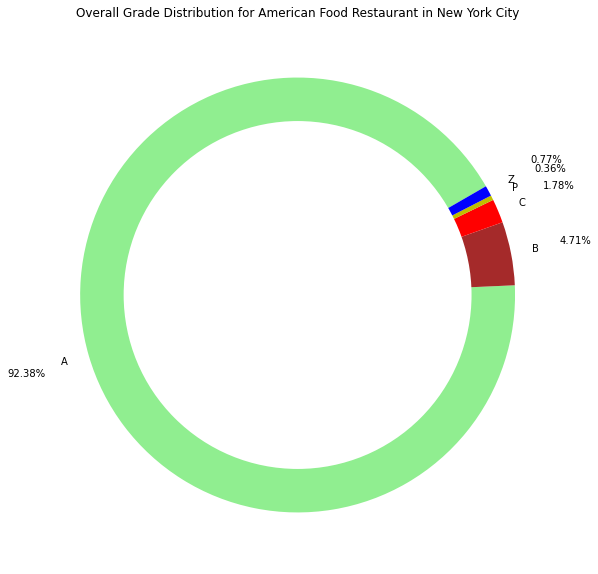

In [185]:
#American
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(gardeby_cuisine.American, labels=gardeby_cuisine.index, autopct='%1.2f%%',
        colors = ['Lightgreen','brown','red','y','blue'],
        startangle=30, pctdistance=1.3) 
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Overall Grade Distribution for American Food Restaurant in New York City")
plt.savefig('american.pdf')  
plt.show()

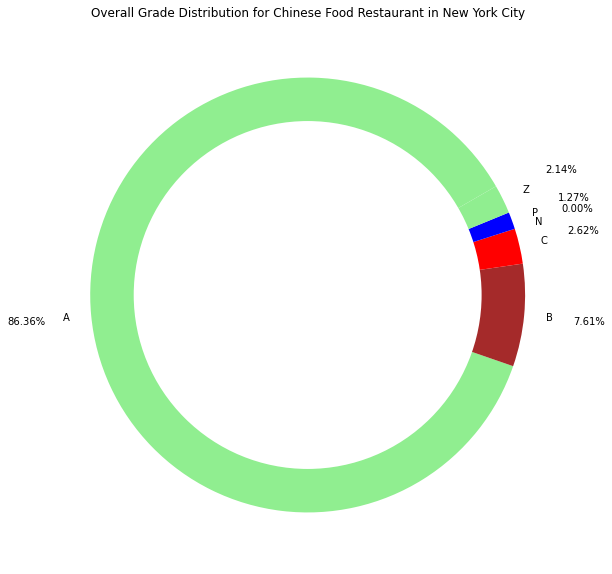

In [41]:
#Chinese
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(gardeby_cuisine.Chinese, labels=gardeby_cuisine.index, autopct='%1.2f%%',
        colors = ['Lightgreen','brown','red','y','blue'],
        startangle=30, pctdistance=1.3) 
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Overall Grade Distribution for Chinese Food Restaurant in New York City")
plt.savefig('chinese.pdf')  
plt.show()

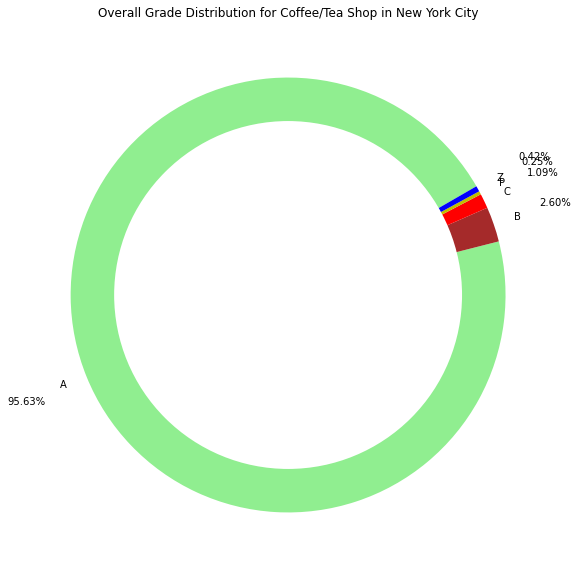

In [189]:
#Coffee/Tea
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(gardeby_cuisine['Coffee/Tea'], labels=gardeby_cuisine.index, autopct='%1.2f%%',
        colors = ['Lightgreen','brown','red','y','blue'],
        startangle=30, pctdistance=1.3) 
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Overall Grade Distribution for Coffee/Tea Shop in New York City")
plt.savefig('coffeetea.pdf')  
plt.show()

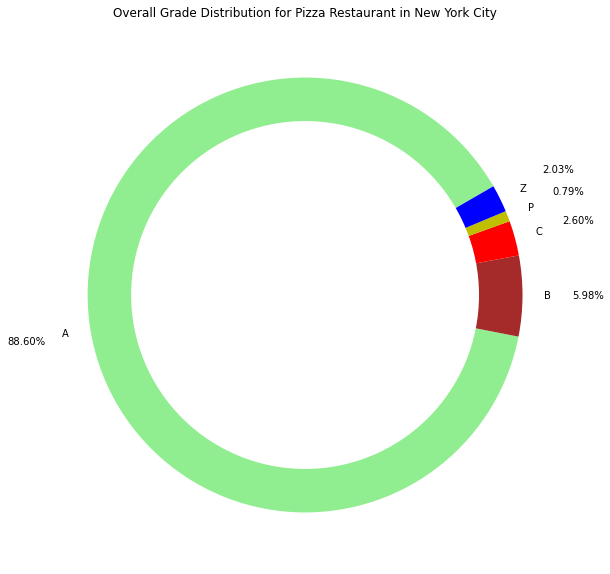

In [190]:
#Pizza
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(gardeby_cuisine.Pizza, labels=gardeby_cuisine.index, autopct='%1.2f%%',
        colors = ['Lightgreen','brown','red','y','blue'],
        startangle=30, pctdistance=1.3) 
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Overall Grade Distribution for Pizza Restaurant in New York City")
plt.savefig('pizza.pdf')  
plt.show()

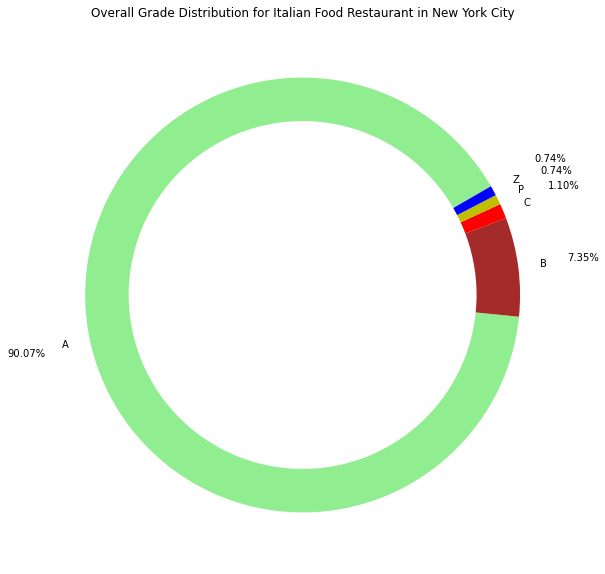

In [191]:
#Italian
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(gardeby_cuisine.Italian, labels=gardeby_cuisine.index, autopct='%1.2f%%',
        colors = ['Lightgreen','brown','red','y','blue'],
        startangle=30, pctdistance=1.3) 
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Overall Grade Distribution for Italian Food Restaurant in New York City")
plt.savefig('Italian.pdf')  
plt.show()

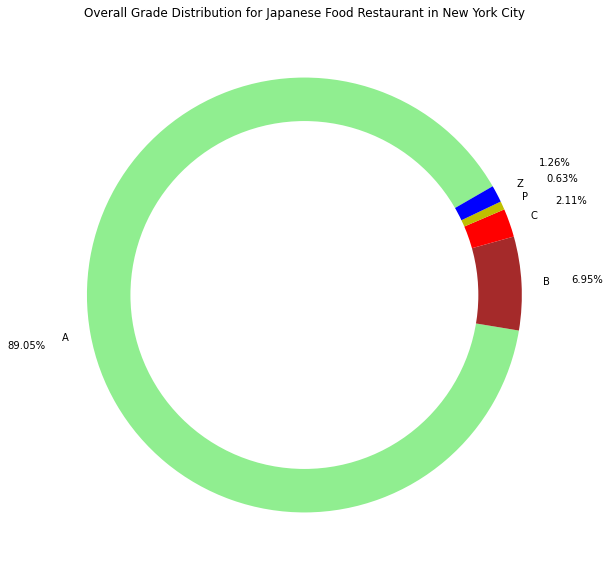

In [192]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(gardeby_cuisine.Japanese, labels=gardeby_cuisine.index, autopct='%1.2f%%',
        colors = ['Lightgreen','brown','red','y','blue'],
        startangle=30, pctdistance=1.3) 
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Overall Grade Distribution for Japanese Food Restaurant in New York City")
plt.savefig('japanese.pdf')  
plt.show()